# Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Import and view the Data

In [ ]:
# Get the Stock
stock = yf.Ticker("AAPL")

# Get historical market data
data_hist = stock.history(start = "2014-01-01",end = "2024-01-01", actions=False, rounding=True)

data_hist.to_csv('stock_Price.csv')

In [ ]:
data = pd.read_csv('stock_price_train_set.csv')

#Reset the index and create a new 'Date'
data.reset_index(inplace=True)

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# View the data
data.head()

,index,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-02 00:00:00-05:00,0,3.75,3.77,3.71,3.74,26009200
2014-01-03 00:00:00-05:00,1,3.75,3.75,3.68,3.70,25933200
2014-01-06 00:00:00-05:00,2,3.73,3.77,3.70,3.75,40949200
2014-01-07 00:00:00-05:00,3,3.78,3.82,3.76,3.81,33328800
2014-01-08 00:00:00-05:00,4,3.82,3.88,3.81,3.86,30819200


In [ ]:
#Get the Stock
#stock = yf.Ticker("NVDA")

#Get historical market data
#data = stock.history(start = "2014-01-01",end = "2019-12-31",actions = False, rounding = True)
#data = stock.history(period =  'max', actions = False, rounding = True)


#Convert the 'Date' column to datetime format:
#data['Date'] = pd.to_datetime(data.index, format = '%Y-%m-%d')
#data.index = data['Date']


#View the data
#data.head()

# Data Preprocessing

Check for missing values and the datatype of the dataset

In [ ]:
data.isna().sum()

index     0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
data['Volume'] = data['Volume'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 2014-01-02 00:00:00-05:00 to 2020-12-29 00:00:00-05:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1761 non-null   int64  
 1   Open    1761 non-null   float64
 2   High    1761 non-null   float64
 3   Low     1761 non-null   float64
 4   Close   1761 non-null   float64
 5   Volume  1761 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 96.3+ KB


In [ ]:
print('Shape of the data:')
print(data.shape)

Shape of the data:
(1761, 6)


In [ ]:
data.describe()

,index,Open,High,Low,Close,Volume
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,880.000000,37.048932,37.630159,36.418773,37.048955,4.584421e+07
std,508.501229,33.676118,34.202880,33.048136,33.640579,2.845463e+07
min,0.000000,3.640000,3.660000,3.610000,3.620000,4.564400e+06
25%,440.000000,5.840000,6.010000,5.780000,5.990000,2.803880e+07
50%,880.000000,35.160000,35.940000,34.500000,35.430000,3.839640e+07
75%,1320.000000,55.620000,56.670000,54.080000,55.520000,5.524960e+07
max,1760.000000,146.660000,146.890000,139.820000,145.240000,3.692928e+08


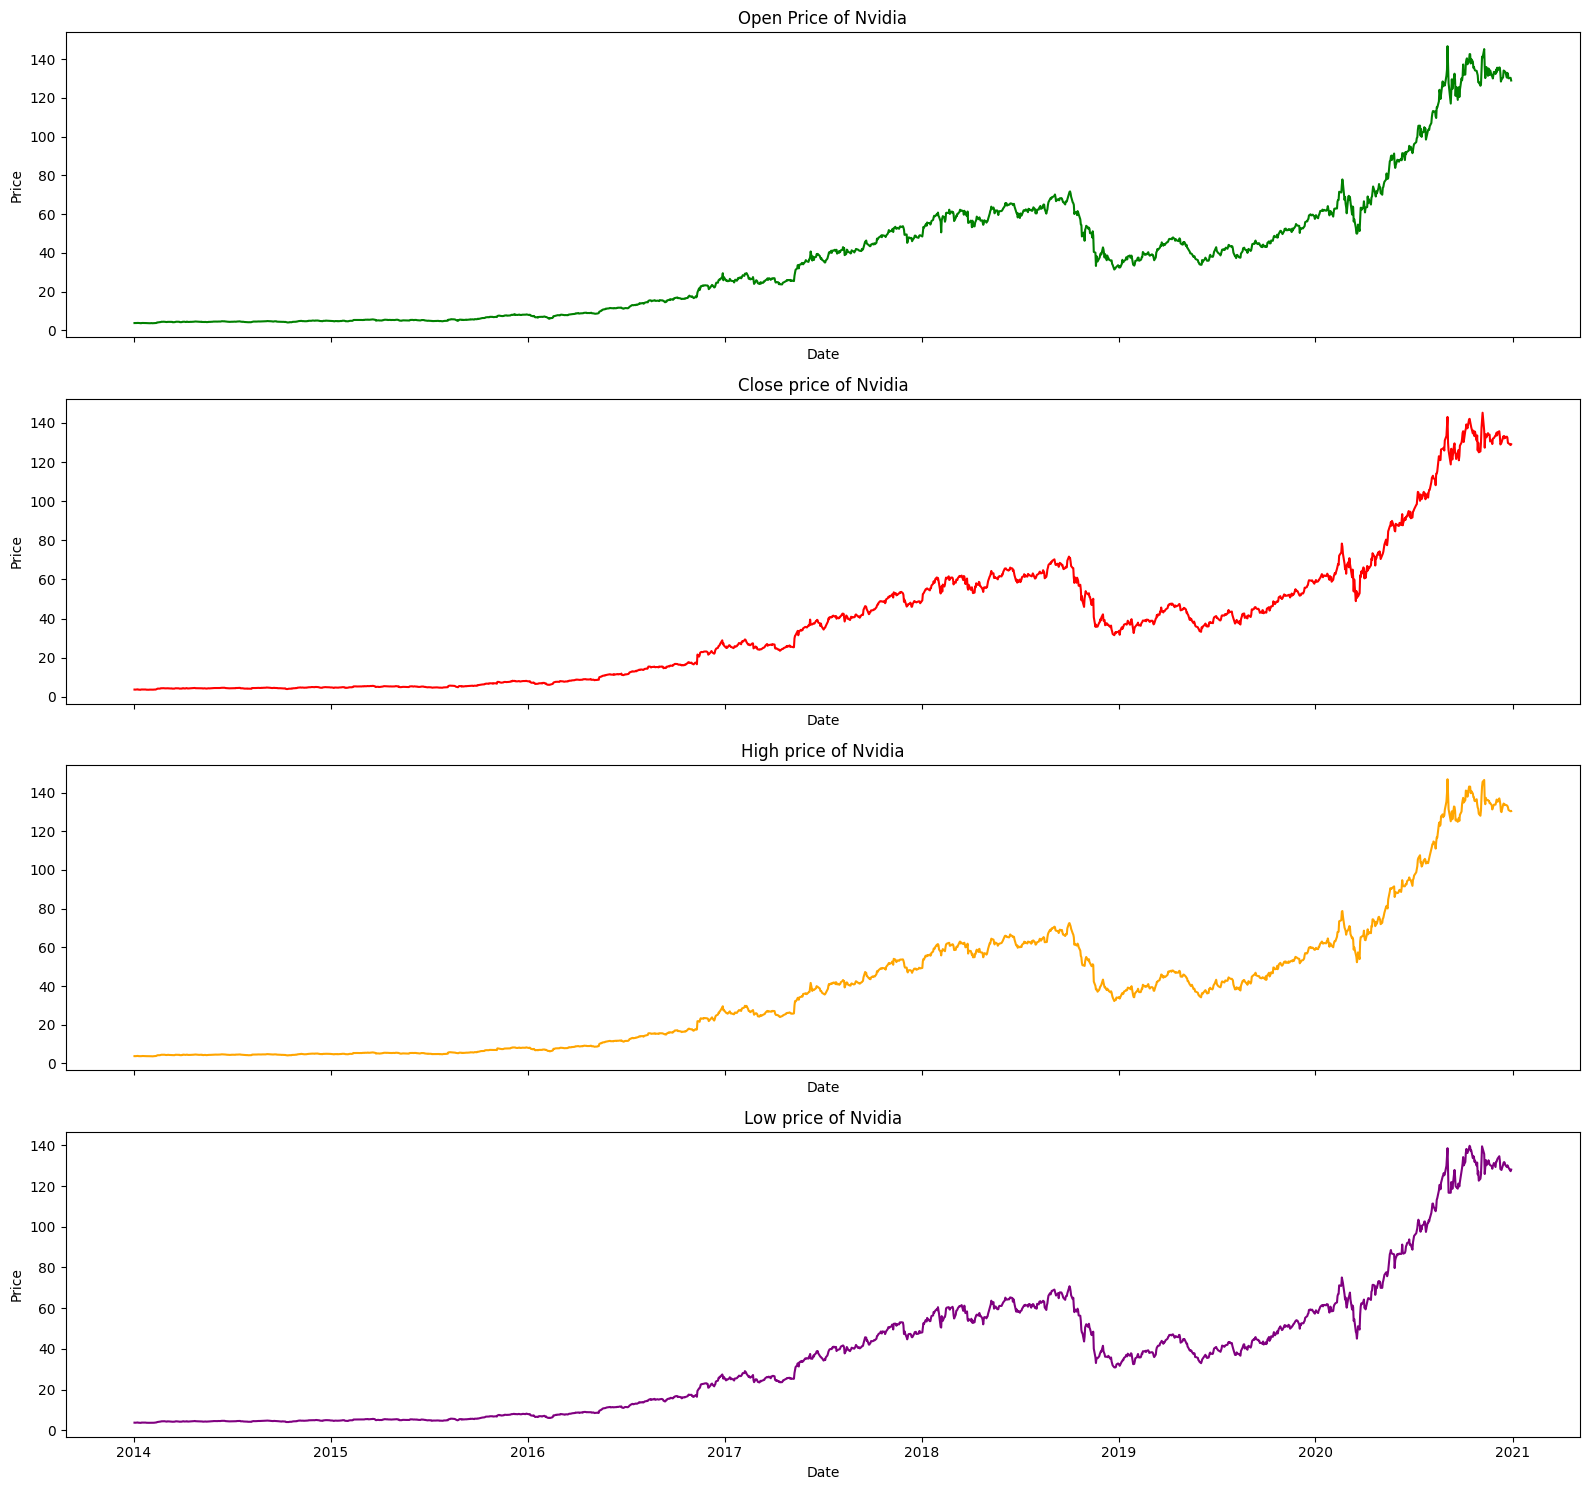

In [ ]:
# Create subplots
fig, ax = plt.subplots(4, 1, figsize=(16, 15), sharex=True)

# Plot each price series
ax[0].plot(data.index, data['Open'], color='green')
ax[1].plot(data.index, data['Close'], color='red')
ax[2].plot(data.index, data['High'], color='orange')
ax[3].plot(data.index, data['Low'], color='purple')

# Customize each subplot
ax[0].set_title('Open Price of NVDA')
ax[1].set_title('Close Price of NVDA')
ax[2].set_title('High Price of NVDA')
ax[3].set_title('Low Price of NVDA')

# Customize subplots
ax[0].set_title('Open Price of Nvidia')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[1].set_title('Close price of Nvidia')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[2].set_title('High price of Nvidia')
ax[2].set_xlabel('Date')
ax[3].set_ylabel('Price')
ax[3].set_title('Low price of Nvidia')
ax[3].set_xlabel('Date')
ax[3].set_ylabel('Price')

# Show the plot
plt.tight_layout()
plt.show()


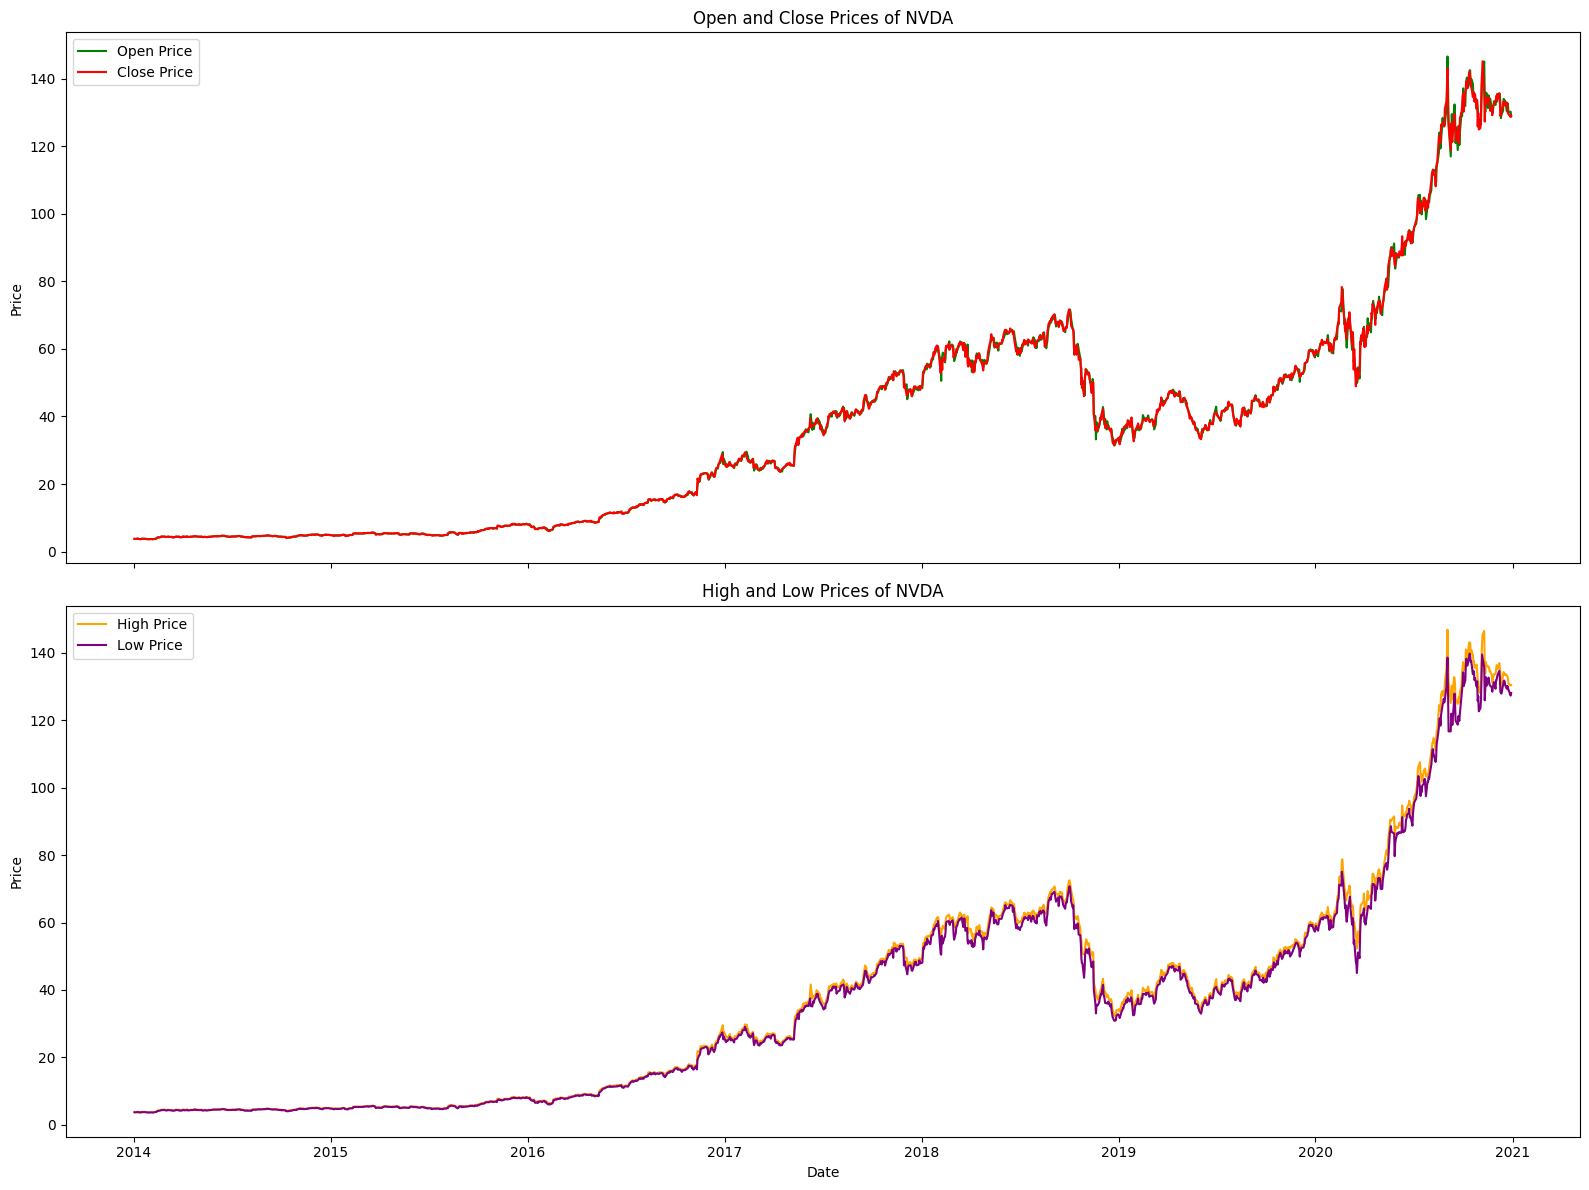

In [ ]:
# Create subplots for stock prices
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 12))

# Plot each price series
ax[0].plot(data.index, data['Open'], color='green', label='Open Price')
ax[0].plot(data.index, data['Close'], color='red', label='Close Price')
ax[0].legend()
ax[1].plot(data.index, data['High'], color='orange', label='High Price')
ax[1].plot(data.index, data['Low'], color='purple', label='Low Price')
ax[1].legend()

# Customize subplots
ax[0].set_title('Open and Close Prices of NVDA')
ax[0].set_ylabel('Price')
ax[1].set_title('High and Low Prices of NVDA')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Find the 7 day rolling mean
data.rolling(7).mean().head(10)

,index,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-09 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-10 00:00:00-05:00,3.0,3.765714,3.792857,3.720000,3.754286,2.972943e+07
2014-01-13 00:00:00-05:00,4.0,3.760000,3.787143,3.707143,3.737143,2.949000e+07
2014-01-14 00:00:00-05:00,5.0,3.744286,3.785714,3.698571,3.742857,2.923994e+07


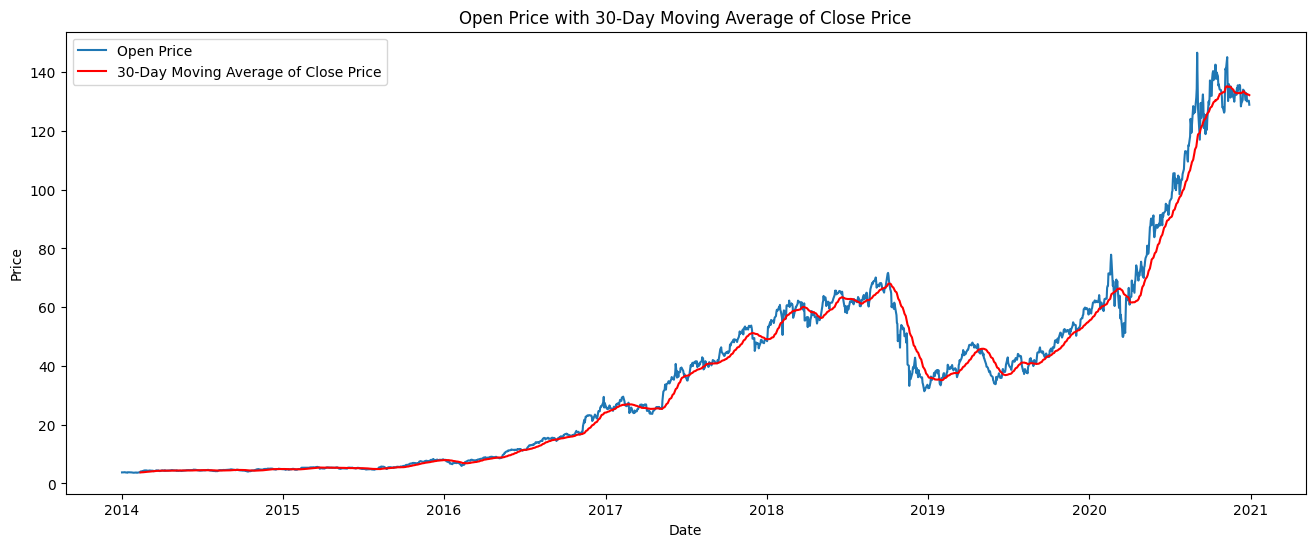

In [ ]:
# Find the Moving Average for the past 30 days

fig, ax = plt.subplots(figsize=(16, 6))


ax.plot(data.index, data['Open'], label='Open Price')

# Calculate the 30-day rolling mean of 'Close' price
rolling_mean_close = data['Close'].rolling(window=30).mean()

# Plot the rolling mean
ax.plot(data.index, rolling_mean_close, label='30-Day Moving Average of Close Price', color='red')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Open Price with 30-Day Moving Average of Close Price')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
#Training set set
training_set = data.iloc[:, 1:2].values

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building and Training the RNN

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from keras.callbacks import EarlyStopping

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define your model
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
regressor.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


# Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

# Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 16ms/step - loss: 0.0062
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 9.7205e-04
Epoch 4/100
38/38 [==============================] - 1s 15ms/step - loss: 8.6473e-04
Epoch 5/100
38/38 [==============================] - 1s 15ms/step - loss: 7.0107e-04
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 7.4629e-04
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0010
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 8.0021e-04
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 8.5023e-04
Epoch 10/100
38/38 [==============================] - 1s 14ms/step - loss: 7.3994e-04
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 5.8048e-04
Epoch 12/100
38/38 [==============================] - 1s 14ms/step - loss: 

# Making the predictions and visualising the results

In [ ]:
dataset_test = pd.read_csv('stock_price_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price.

In [ ]:
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


# Visualizing Stock Prices

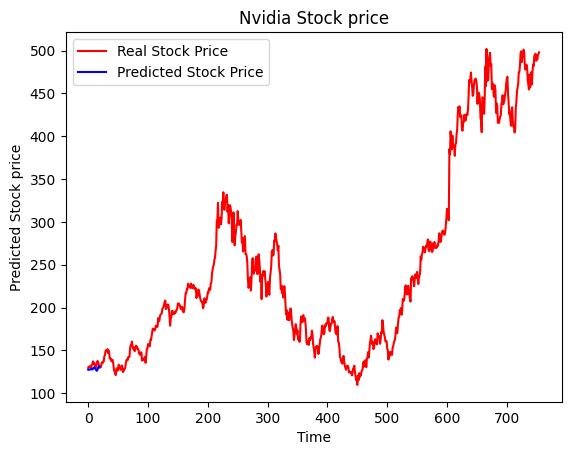

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Nvidia Stock price')
plt.xlabel('Time')
plt.ylabel('Predicted Stock price')
plt.legend()
plt.show()